# Simple Linear Regression model without buildin function

In [1]:
## Fetch dataset from sklearn module
from sklearn.datasets import make_regression
## Extract the independent and dependent features
X, Y = make_regression(n_samples = 10000, n_features = 1, n_targets = 1, bias = 2.5, noise = 30, random_state = 50)

In [22]:
print(X.shape)
print(Y.shape)

(10000, 1)
(10000,)
0.13451620574565026


In [9]:
## Divide the data into train and test sets (i.e train 70% and test 30%)
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 50)
print(f'training set size, {X_train.shape}, {Y_train.shape}')
print(f'testing set size, {x_test.shape}, {y_test.shape}')

training set size, (7000, 1), (7000,)
testing set size, (3000, 1), (3000,)


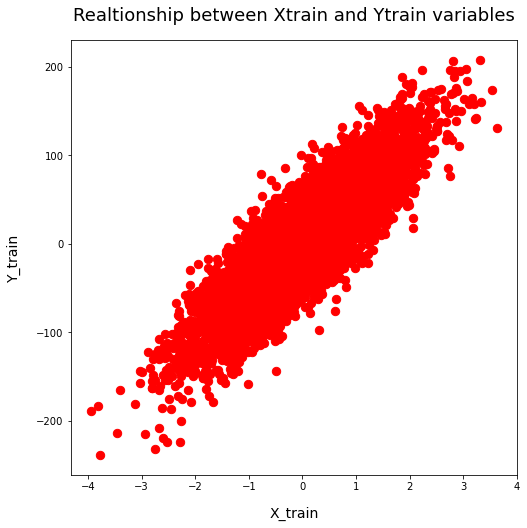

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.xlabel('X_train', fontsize=14, labelpad=15)
plt.ylabel('Y_train', fontsize=14, labelpad=15)
plt.title('Realtionship between Xtrain and Ytrain variables',fontsize=18, y=1.03)
plt.scatter(X_train,Y_train, c='red', s=70)

In [23]:
import numpy as np

class simpleLinearRegression:
    
    def __init__(self, lrate = 0.01, n_steps = 10000):
        self.lrate = lrate
        self.n_steps = n_steps
        
    def fit(self, X, Y):
        '''Method for learning the optimal parameters of the model'''
        
        # adding the bias term
        Xtrain = np.c_[np.ones(X.shape[0]), X]
        
        # random initialization of the model weights
        self.W = np.random.rand((Xtrain.shape[1]))
        
        # iteratively updating W for n_steps
        for i in range(self.n_steps):
            self.W = self.W - self.lrate * self.calcGradient(Xtrain, Y)
    
    def predict(self, X):
        '''Predicting Y for the X'''
        
        # adding the bias term
        Xpred = np.c_[np.ones(X.shape[0]), X]
        
        return np.dot(Xpred, self.W)
    
    def calcGradient(self, X, Y):
        '''Implementation of the gradient of the Loss function'''
        ## X.T will do transpose of X
        return 2/X.shape[0] * np.dot(X.T, (np.dot(X, self.W) - Y))

In [24]:
## training the model
model = simpleLinearRegression()
model.fit(X_train, Y_train)

In [25]:
## predict values
y_pred = model.predict(x_test)

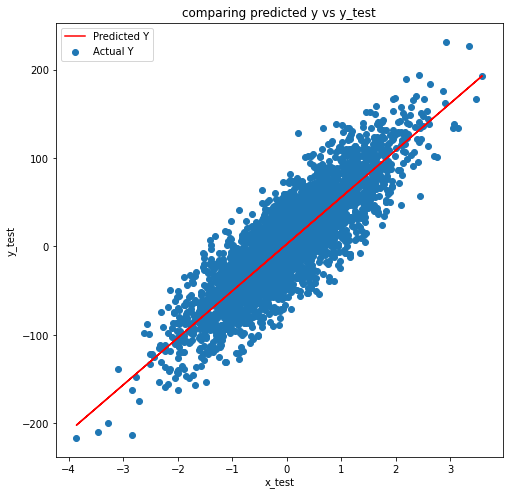

In [36]:
plt.figure(figsize=(8,8))
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('comparing predicted y vs y_test')
plt.scatter(x_test, y_test, label='Actual Y')
plt.plot(x_test, y_pred, c = 'red', label='Predicted Y')
plt.legend()

In [33]:
## calculate accuracy using root_mean_square_error
import math
def rmse(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        error = predicted[i] - actual[i]
        sum_error += error**2
    mean_error = sum_error/float(len(actual))
    return math.sqrt(mean_error)

In [34]:
rmse(y_test, y_pred) ## less the rmse better the model

30.459155622257704